C:\Users\Harish Kummara\AppData\Local\Temp\ipykernel_37348\1364051088.py:42: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Harish Kummara\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


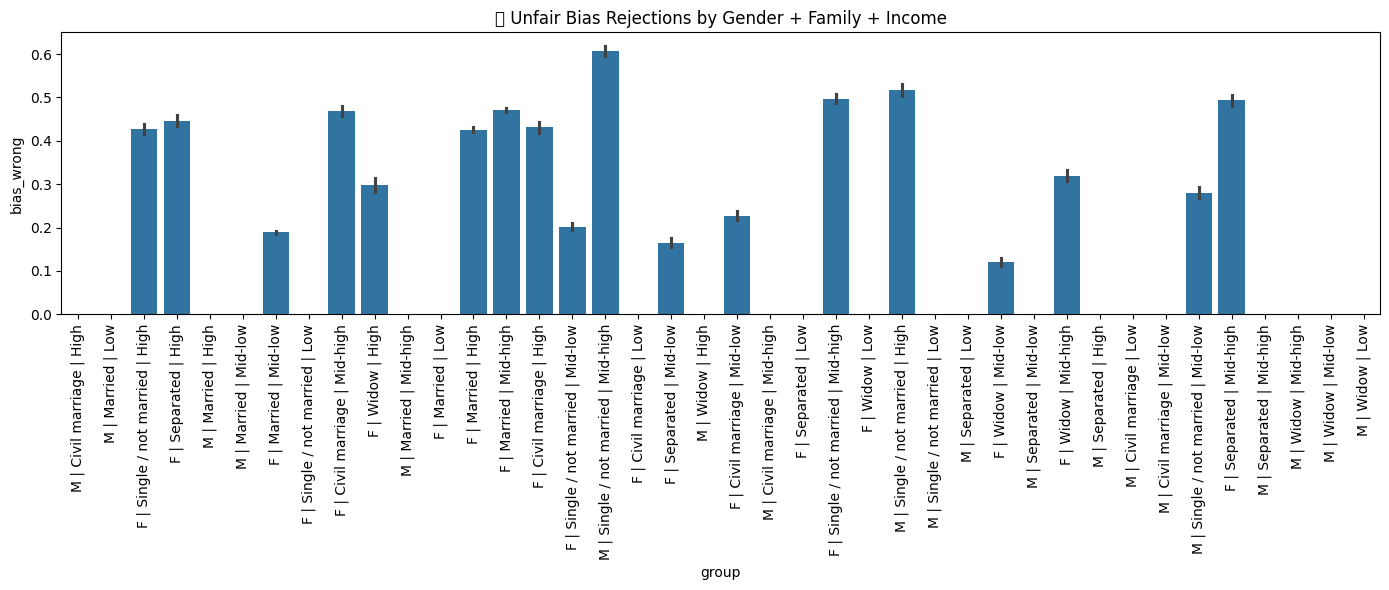

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


app = pd.read_csv('data/application_record.csv')
credit = pd.read_csv('data/credit_record.csv')


app = app[['ID', 'CODE_GENDER', 'NAME_INCOME_TYPE', 'NAME_FAMILY_STATUS', 'AMT_INCOME_TOTAL']]
credit_summary = credit.groupby('ID')['STATUS'].apply(lambda s: s.isin(['1','2','3','4','5']).sum()).reset_index()
credit_summary.columns = ['ID', 'overdue_months']

df = app.merge(credit_summary, on='ID', how='left')
df['overdue_months'] = df['overdue_months'].fillna(0)


def behavior_based_approval(row):
    return int(row['AMT_INCOME_TOTAL'] > 150000 and row['NAME_INCOME_TYPE'] == 'Working' and row['overdue_months'] <= 2)

def biased_approval(row):
    bias_flag = 0
    if row['CODE_GENDER'] == 'F':
        bias_flag += 1
    if row['NAME_FAMILY_STATUS'] == 'Single / not married':
        bias_flag += 1
    return int(row['AMT_INCOME_TOTAL'] > 150000 and row['NAME_INCOME_TYPE'] == 'Working' and bias_flag == 0)

df['approved_behavior'] = df.apply(behavior_based_approval, axis=1)
df['approved_biased'] = df.apply(biased_approval, axis=1)
df['bias_wrong'] = (df['approved_behavior'] == 1) & (df['approved_biased'] == 0)


df['income_group'] = pd.qcut(df['AMT_INCOME_TOTAL'], 4, labels=["Low", "Mid-low", "Mid-high", "High"])
df['group'] = df['CODE_GENDER'] + ' | ' + df['NAME_FAMILY_STATUS'] + ' | ' + df['income_group'].astype(str)


plt.figure(figsize=(14, 6))
sns.barplot(x='group', y='bias_wrong', data=df)
plt.title("📊 Unfair Bias Rejections by Gender + Family + Income")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()



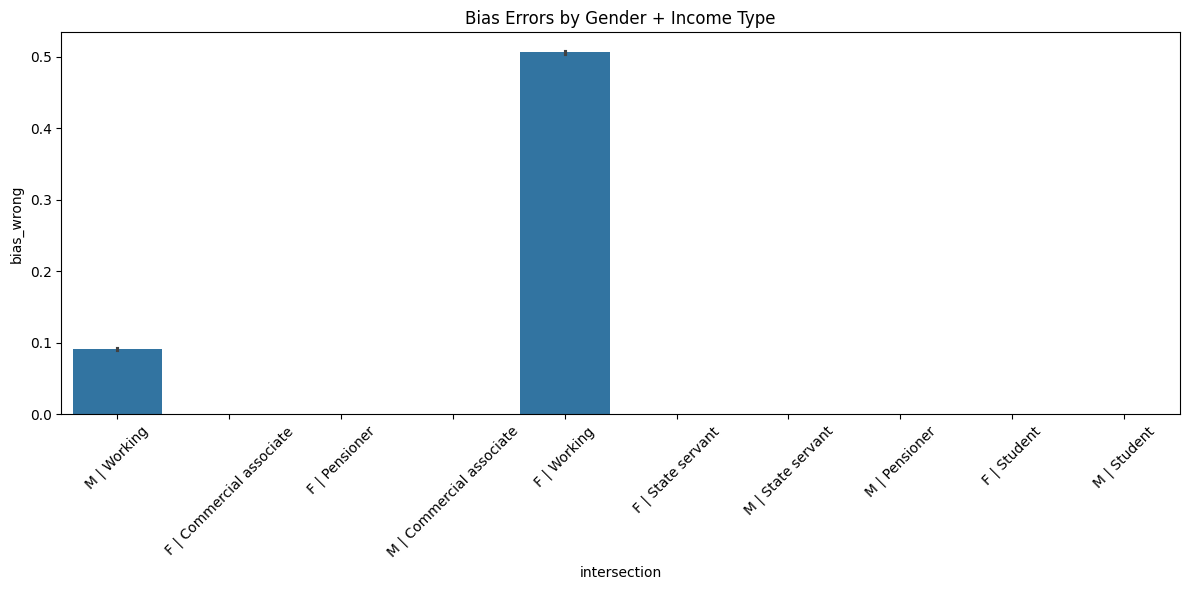

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


df['intersection'] = df['CODE_GENDER'] + ' | ' + df['NAME_INCOME_TYPE']


plt.figure(figsize=(12, 6))
sns.barplot(x='intersection', y='bias_wrong', data=df)
plt.xticks(rotation=45)
plt.title("Bias Errors by Gender + Income Type")
plt.tight_layout()
plt.show()
